In [16]:
# Initialize Otter
import otter
grader = otter.Notebook("Homework_3.ipynb")

In [17]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plots

import random

# Homework #3

The purpose of this homework is to help you solidify your knowledge of hypothesis testing.

<!-- BEGIN QUESTION -->

## Problem 1: Celebrity Height

Heights in men and women are well-approximated by normal distributions. For men, the mean is around 70 inches and the standard deviation is 3 inches. For women, the mean and the standard deviation are 64.5in and 2.5in, respectively. 

There is a website that collects heights of celebrities (celebheights.com if you're curious). There is a button on the website that you can click and it will show you a photo and the height of a randomly selected celebrity. I did this, and obtained the following data

|Celebrity Name | Celebrity Height | M/F |
|:-|:-|:-|
|Hannah Waddingham | 5ft 11in | F |
|Renee Felice Smith | 5ft 0.5in | F | 
|Bonita Friedericy | 5ft 2.5in | F |
|Robert Beltran | 5ft 10.5in | M |
|Josef Altin | 5ft 5.75in | M |
|Jeremy Jordan | 5ft 8.25in | M |
|Emily Bett Rickards | 5ft 5in | F |
|Brent Spiner | 5ft 9.5in | M | 
|Ricky Hatton | 5ft 6in | M |
|Josh Herdman | 5ft 10.5in | M |
|Ian H Watkins | 5ft 7in | M |
|Spencer Wilding | 6ft 6in | M |
|Jane Wiedlin | 5ft 1in | F |
|Ross Marquand | 6ft 0in | M |
|Dean Cain | 5ft 11.5in | M |
|Kerry Ingram | 5ft 1.5in | F |
|Travis Wester | 5ft 8in | M |
|Lindsay Wagner | 5ft 9in | F |
|Enver Gjokaj | 5ft 10in | M |
|Robert Hays | 5ft 10.5in | M |
|Milo Ventimiglia | 5ft 8.5in | M |
|Adrian Paul | 6ft 0in | M |
|Leslie Grantham | 6ft 0in | M |
|Megan Gallagher | 5ft 6.5in | F |

Say you have a hunch that celebrities are taller than general population. Separately for men and women, perform a hypothesis test to decide whether you are right. Specify all relevant ingredients of your hypothesis test and discuss the outcome. 

For male:

$H_0$ : celebraties are not taller than general population

$H_1$ : celebraties are taller than general population

$X$ : average height of male celebraties in the sample = (84 ft 112 inch)/ 16 = (1008+112)inch/16 = 70 inch

$\alpha = 0.05$

$Z_{observed} = \frac{X-\mu}{\sigma/\sqrt{n}}$ = 0

P value = $\mathbb{P}[Z \geq Z_{observed}] = \mathbb{P}[Z \geq 0] = 0.5 $ which is greater than 0.05, so we fail to reject the null hypothesis.

For female:

$H_0$ : celebraties are not taller than general population

$H_1$ : celebraties are taller than general population

$X$ : average height of female celebraties in the sample = (40 ft 37 inch)/ 8 = (480+37)inch/8 = 64.625 inch

$\alpha = 0.05$

$Z_{observed} = \frac{X-\mu}{\sigma/\sqrt{n}}$ = 0.1414

P value = $\mathbb{P}[Z \geq Z_{observed}] = \mathbb{P}[Z \geq 0.1414] = 0.4443 $ which is greater than 0.05, so we fail to reject the null hypothesis.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 2: Epidemiology and Hypothesis Testing

Hypothesis testing is often used in epidemiology and one example of a situation in which you would use a hypothesis test is as follows. 

Creutzfeld-Jacob disease is a degenerative brain disease with symptoms very much like that of mad cow disease. It is not known how the disease is propagated, and one conjecture is that arises spontaneously due to chance protein
misfolding. Suppose that this is true, and that the average number of cases seen in England per year is 10. Suppose that there were 15 cases seen last year in England. Does appearance of so many cases in one year shed significant doubt on the hypothesis that the disease arises spontaneously?

Write down all parameters of a hypothesis test you would take, assuming that the number of cases $X$ of Creutzfeld-Jacob disease is well-approximated by the Poisson distribution with parameter $\lambda = 10$ (under Poisson distribution with $\lambda = 10$, $\mathbb{P}[X = k] = \frac{1}{n!}\lambda^n e^{-\lambda}$, where $k \in \{0, 1, 2, \dots\}$). You can use Python to compute the relevant p-value.  

$H_0$ : the disease arise spontaneously

$H_1$ : the disease does not arise spontaneously

$X$ : Number of cases = 15

$\alpha = 0.05$

P-value = $\mathbb{P}[X \geq 15]$ = 0.048 < 0.05, so we reject null hypothesis(for one sided)

For two sided, P value = 0.11 > 0.05, so we fail to reject null hypothesis.

In [18]:
from scipy.stats import poisson
a = poisson.cdf(15,10)
p = 1 - a
print(p) ##for one sided

##For two sided:
b = poisson.cdf(5,10)
print(b+p)

0.04874040330397866
0.11582636618301055


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 3: Distributional Shifts in Machine Learning

In machine learning, we typically train and test our model on two different data sets, namely training dataset and test dataset. Ideally speaking, the test dataset should be independent of the training dataset, but follow the same probability distribution as the training dataset. However, in practice, there are often distributional shifts between the training dataset and the test dataset, meaning that the distributions of the two datasets are not the same. **In this problem, you are asked to use hypothesis testing to determine whether there is a distributional shift between two datasets.**

To simplify the problem, we here consider $1$ dimensional data, and annotate data from the training data with label $0$ and test data with label $1$.

In [19]:
data = pd.read_csv("./hw3_data.csv")
data

,data,label
0,100,0
1,135,0
2,93,0
3,178,0
4,140,0
...,...,...
995,140,1
996,125,1
997,145,1
998,111,1


### The Hypotheses

1. Write down what are your null hypothesis and the alternative hypothesis.

$H_0$: the distribution of the training and test dataset are same
$H_1$: the distribution of the training and test dataset are not same

<!-- END QUESTION -->

### Test Statistics

We use the difference between the two group means as our statistic. When the difference is small, it is reasonable to say that the distributions of the training dataset and test dataset are close to each other. We will do the subtraction in the order "mean of the training dataset −  mean of the test dataset". Values far from zero of this statistic will favor the alternative hypothesis.

2. Write a function that computes this statistics. The function takes two arguments:
​
- the name of the DataFrame of data
- the label of the column that contains the labels (0, 1) for grouping
​

It returns the difference between the means of the training dataset and the test dataset.

Hint: You can call `.groupby()` to group data by the values of some column, and use `.mean()` to compute the mean of each group.

In [20]:
def difference_of_means(df, group_label):
    """
    Parameters
    ----------
    df: pandas.DataFrame
        varibale name of the DataFrame of data.
    group_label: string
        column label 0, 1 that indicates the group to which the row belongs

    Returns
    -------
    float
        Difference between the means of the training dataset and the test dataset.
    """
    train = df[df.label == 0]
    test = df[df.label == 1]
    #print(df)
    #print(group_label)
    return train['data'].mean() - test['data'].mean()

In [21]:
grader.check("p3-2")

p3-2 results: All test cases passed!

### Predicting the Statistic Under the Null Hypothesis

One way to simulate the statistic under the null hypothesis is to use random permutations. If there were no difference between the two distributions of the training dataset and the test dataset, then whether a data point has the label $0$ or $1$ should make no difference to the mean. The idea, then, is to shuffle all the labels randomly among the entire dataset. This is called random permutation.


The shuffling operation should ensure that the count of $0$ labels does not change, and nor does the count of $1$ labels. This is important for the comparability of the simulated differences of means and the original difference of means.

Take the difference of the two new group means: the mean of the data whose labels have been randomly labeled $0$ and the mean of the remaining data who have all been randomly labeled $1$. This is a simulated value of the test statistic under the null hypothesis.

In [22]:
data

,data,label
0,100,0
1,135,0
2,93,0
3,178,0
4,140,0
...,...,...
995,140,1
996,125,1
997,145,1
998,111,1


There are $1000$ rows in the table. To shuffle all the labels, we can draw a random sample of $1000$ rows without replacement. Then the sample will include all the rows of the table, in random order. This can be done using `pandas` method `sample` with the optional `frac=1, replace=False` arguments. Here we use the `frac` argument to specify the sample size to be the size of the entire dataset.

In [23]:
shuffled_labels = data["label"].sample(frac=1, replace=False, random_state=0).values
shuffled_data = pd.DataFrame({"data": data["data"].values, "label": shuffled_labels})
shuffled_data

,data,label
0,100,1
1,135,1
2,93,0
3,178,0
4,140,0
...,...,...
995,140,1
996,125,0
997,145,0
998,111,0


3. Write a function that simulates one value of the test statistic under the null hypothesis. This function takes one optional `random_state` argument to fix the randomness, and returns the difference between the means of two groups formed by randomly shuffling all the labels. Note that here we do not need to take the DataFrame of the data as the argument, because we have declared it above. 

Hint: Use the shuffling strategy and the function `difference_of_means` above. Note that you can directly call `data` already defined above.

In [24]:
def one_simulated_difference_of_means(random_state):
    """
    Parameters
    ----------
    random_state: int
        random seed used to fix the randomness.

    Returns
    -------
    float
        Difference between the means of two groups formed by randomly shuffling all the labels.
    """
    shuffled_labels = data["label"].sample(frac=1, replace=False, random_state=random_state).values
    shuffled_data = pd.DataFrame({"data": data["data"].values, "label": shuffled_labels})
    #shuffled_data
    return difference_of_means(shuffled_data, shuffled_labels)

In [25]:
grader.check("p3-3")

p3-3 results: All test cases passed!

### Permutation Test

4. Tests based on random permutations of the data are called *permutation tests*. In the cell below, you are asked to write a function that simulates our test statistic (difference between the means of two groups formed by randomly shuffling all the labels) many times and collects the differences in an array. Here we do $5000$ repetitions, and in the $i$-th simulation, set `random_state=i`, where $i = 0, 1, \dots, 4999$.

In [26]:
def permutation_test(repetitions=5000):
    """
    Parameters
    ----------
    repetitions: int
        Total number of repetitions to do simulations. Already set to be 5000.

    Returns
    -------
    numpy.array
        Array of differences between the means of two groups formed by randomly shuffling all the labels 
        in each simulation.
    """
    ...
    i = 0
    
    a = []
    while (i<repetitions):
        shuffled_labels = data["label"].sample(frac=1, replace=False, random_state=i).values
        shuffled_data = pd.DataFrame({"data": data["data"].values, "label": shuffled_labels})
        a.append(difference_of_means(shuffled_data, shuffled_labels))
        i += 1
    #print(a)
    return np.array(a)
        
        

In [27]:
grader.check("p3-4")

p3-4 results: All test cases passed!

<!-- BEGIN QUESTION -->

5. Draw a histogram that shows the distribution of $5000$ simulations. 

Hint: Use the function `permutation_test` to obtain an array of results. Transform it into DataFrame in pandas and use `.hist()` to draw the histogram.

<AxesSubplot:>

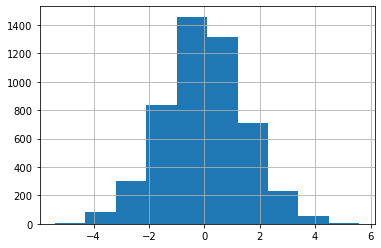

In [28]:
""" to be implemented """
dis = permutation_test(repetitions=5000)
dist = pd.DataFrame({'test_stat':dis})
dist['test_stat'].hist()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Conclusion of the Test

The histogram drawn above shows the empirical distribution of the test statistic simulated under the null hypothesis. We define the empirical p-value of the test to be the proportion of the absolute values of simulated differences that were equal to or larger than the absolute observed difference in the original dataset. 

6. Compute the absolute observed difference and the corresponding empirical p-value of the test, using the simulated results above. Conclude the test.

In [29]:
""" to be implemented """
abs_obs_diff = difference_of_means(data, data['label'])
print(abs_obs_diff)
dis = permutation_test(repetitions=5000)
dist = pd.DataFrame({'test_stat':dis})
print(len(dist))
tmp = len(dist)
##dist = dist[dist.test_stat >= abs_obs_diff]

dist['abs_val'] = abs(dist['test_stat']) ##absolute values of simulated differences
dist = dist[dist.abs_val >= abs(abs_obs_diff)]

print(len(dist))
emp_pval = len(dist)/tmp
print(emp_pval)
##As the empirical p value = 0.29 > 0.05, we fail to reject the null hypothesis

1.4902465955097597
5000
1494
0.2988


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

p3-2 results: All test cases passed!

p3-3 results: All test cases passed!

p3-4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please download the zip file after running the cell below, then upload the zip file to GradeScope for submission. You can also download your notebook as an IPYNB file for the submission. Please also export your notebook as a PDF file (Use **Command/Control + P** if you have issues with the native export as PDF feature). **Please upload and submit both the IPYNB file and the PDF via Gradescope (entry code: GEWXGD).**

In [31]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)